In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyramid-arima

     -------------------------------------- 515.6/515.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
  Running setup.py install for pyramid-arima: started
  Running setup.py install for pyramid-arima: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [176 lines of output]
  Partial import of pyramid during the build process.
  
  Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
  Adding extra setuptools args
  C:\Users\HP\anaconda3\lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:/Users/HP/anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  blis_info:
    libraries blis not found in ['C:\\Users\\HP\\anaconda3\\lib', 'C:\\', 'C:\\Users\\HP\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
    libraries

In [8]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\Major_City_1900_2012.csv")
df

,Date,Avg_Temp,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,01-01-1900,18.814,0.685,Ahmadabad,India,23.31N,72.52E
1,01-01-1900,23.390,1.706,Bangalore,India,12.05N,77.26E
2,01-01-1900,24.310,1.250,Bombay,India,18.48N,72.68E
3,01-01-1900,19.778,0.613,Calcutta,India,23.31N,88.25E
4,01-01-1900,14.129,0.578,Delhi,India,28.13N,77.27E
...,...,...,...,...,...,...,...
18979,01-12-2012,26.222,0.873,Madras,India,13.66N,80.09E
18980,01-12-2012,20.465,0.910,Nagpur,India,21.70N,78.75E
18981,01-12-2012,16.566,0.427,New Delhi,India,28.13N,77.27E
18982,01-12-2012,21.747,0.498,Pune,India,18.48N,74.37E


In [9]:
df.tail()

,Date,Avg_Temp,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
18979,01-12-2012,26.222,0.873,Madras,India,13.66N,80.09E
18980,01-12-2012,20.465,0.910,Nagpur,India,21.70N,78.75E
18981,01-12-2012,16.566,0.427,New Delhi,India,28.13N,77.27E
18982,01-12-2012,21.747,0.498,Pune,India,18.48N,74.37E
18983,01-12-2012,22.504,0.578,Surat,India,21.70N,73.56E


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           18984 non-null  object 
 1   Avg_Temp                       18984 non-null  float64
 2   AverageTemperatureUncertainty  18984 non-null  float64
 3   City                           18984 non-null  object 
 4   Country                        18984 non-null  object 
 5   Latitude                       18984 non-null  object 
 6   Longitude                      18984 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.0+ MB


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           18984 non-null  datetime64[ns]
 1   Avg_Temp                       18984 non-null  float64       
 2   AverageTemperatureUncertainty  18984 non-null  float64       
 3   City                           18984 non-null  object        
 4   Country                        18984 non-null  object        
 5   Latitude                       18984 non-null  object        
 6   Longitude                      18984 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.0+ MB


In [12]:
df.head()

,Date,Avg_Temp,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1900-01-01,18.814,0.685,Ahmadabad,India,23.31N,72.52E
1,1900-01-01,23.390,1.706,Bangalore,India,12.05N,77.26E
2,1900-01-01,24.310,1.250,Bombay,India,18.48N,72.68E
3,1900-01-01,19.778,0.613,Calcutta,India,23.31N,88.25E
4,1900-01-01,14.129,0.578,Delhi,India,28.13N,77.27E


In [13]:
df = df.set_index('Date')

In [14]:
#Check Zero Values
print((df==0).sum())

Avg_Temp                         0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


In [15]:
dataplot=sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu",annot=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [16]:
# Remove not usefull columns

df = df.drop(['AverageTemperatureUncertainty'], axis=1)

In [11]:
df1=df[df['City']=='Bombay']
df1

,Avg_Temp,City,Country,Latitude,Longitude
Date,,,,,
1900-01-01,24.310,Bombay,India,18.48N,72.68E
1900-01-02,24.235,Bombay,India,18.48N,72.68E
1900-01-03,25.973,Bombay,India,18.48N,72.68E
1900-01-04,27.596,Bombay,India,18.48N,72.68E
1900-01-05,29.045,Bombay,India,18.48N,72.68E
...,...,...,...,...,...
2012-01-08,27.405,Bombay,India,18.48N,72.68E
2012-01-09,27.491,Bombay,India,18.48N,72.68E
2012-01-10,28.689,Bombay,India,18.48N,72.68E


In [12]:
df1['Avg_Temp']=df1['Avg_Temp'].interpolate()

C:\Users\DELL\AppData\Local\Temp/ipykernel_4332/958661920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Avg_Temp']=df1['Avg_Temp'].interpolate()


<AxesSubplot:xlabel='Date'>

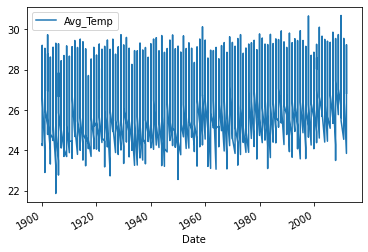

In [13]:
df1.plot()

# Decomposition of a Time Series

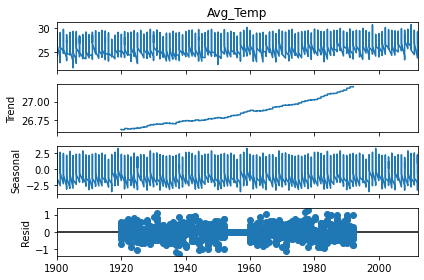

In [14]:
decompose = seasonal_decompose(df1['Avg_Temp'],model='additive', period=480)
decompose.plot()
plt.show()

# Checking whether the data is stationary

In [17]:
#Ho: It is non stationary
#H1: It is stationary

from statsmodels.tsa.stattools import adfuller 
def adf_test(df1):
    df1test = adfuller (df1, autolag = 'AIC')
    print("1. ADF: ",df1test[0]) 
    print("2. P-Value: ", df1test [1])
    print("3. Num of Lags: ", df1test [2])
    print("4. Num Of Observations Used For ADF Regression:",df1test[3]) 
    print("5. Critical Values :")
    for key, val in df1test [4].items(): 
        print("\t", key, ":", val)
adf_test(df1['Avg_Temp'])
    

NameError: name 'df1' is not defined

p-value <=0.05 then we reject null hypothesis(data is stationary)

In [18]:
df.head()

,Avg_Temp,City,Country,Latitude,Longitude
Date,,,,,
1900-01-01,18.814,Ahmadabad,India,23.31N,72.52E
1900-01-01,23.390,Bangalore,India,12.05N,77.26E
1900-01-01,24.310,Bombay,India,18.48N,72.68E
1900-01-01,19.778,Calcutta,India,23.31N,88.25E
1900-01-01,14.129,Delhi,India,28.13N,77.27E


In [19]:
## making dataset of each city
CITY=df.City.unique()
combination=[] 
for city in CITY:
    locals()[city]=pd.DataFrame(df[df["City"]==city])
    combination.append(city)

In [20]:
combination

['Ahmadabad',
 'Bangalore',
 'Bombay',
 'Calcutta',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Kanpur',
 'Lakhnau',
 'Madras',
 'Nagpur',
 'New Delhi',
 'Pune',
 'Surat']

In [21]:
Ahmadabad 
## either you can give city name and it will show you with that specific city dataframe

,Avg_Temp,City,Country,Latitude,Longitude
Date,,,,,
1900-01-01,18.814,Ahmadabad,India,23.31N,72.52E
1900-01-02,22.210,Ahmadabad,India,23.31N,72.52E
1900-01-03,27.790,Ahmadabad,India,23.31N,72.52E
1900-01-04,30.873,Ahmadabad,India,23.31N,72.52E
1900-01-05,32.646,Ahmadabad,India,23.31N,72.52E
...,...,...,...,...,...
2012-01-08,28.086,Ahmadabad,India,23.31N,72.52E
2012-01-09,28.087,Ahmadabad,India,23.31N,72.52E
2012-01-10,28.078,Ahmadabad,India,23.31N,72.52E


In [22]:
locals()[combination[0]] 
## second way you can assess your specific city data but while to loop this method is to be preferred

,Avg_Temp,City,Country,Latitude,Longitude
Date,,,,,
1900-01-01,18.814,Ahmadabad,India,23.31N,72.52E
1900-01-02,22.210,Ahmadabad,India,23.31N,72.52E
1900-01-03,27.790,Ahmadabad,India,23.31N,72.52E
1900-01-04,30.873,Ahmadabad,India,23.31N,72.52E
1900-01-05,32.646,Ahmadabad,India,23.31N,72.52E
...,...,...,...,...,...
2012-01-08,28.086,Ahmadabad,India,23.31N,72.52E
2012-01-09,28.087,Ahmadabad,India,23.31N,72.52E
2012-01-10,28.078,Ahmadabad,India,23.31N,72.52E


Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.92 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6236.579, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4621.658, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10224.061, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5267.209, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2776.283, Time=2.53 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3345.576, Time=1.36 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=8.87 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3013.628, Time=7.51 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4243.588, Time=2.24 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=3121.507, Time=7.09 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=7.89 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.54

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-pack

mse: 0.7695410045377389
Training data size: 1084
Testing data size: 272
mse_hw: 0.733809054042971


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Ahmadabad
            Future_forecast
Date                       
2013-01-01        20.241470
2013-01-02        22.581123
2013-01-03        27.629374
2013-01-04        31.496445
2013-01-05        33.673133
2013-01-06        32.337068
2013-01-07        29.260995
2013-01-08        27.945086
2013-01-09        28.373452
2013-01-10        28.224479
2013-01-11        25.280004
2013-01-12        21.734697
2014-01-01        19.971365
2014-01-02        22.577435
2014-01-03        27.624862
2014-01-04        31.491301
2014-01-05        33.667634
2014-01-06        32.331787
2014-01-07        29.256216
2014-01-08        27.940522
2014-01-09        28.368819
2014-01-10        28.219869
2014-01-11        25.275875
2014-01-12        21.731148
2015-01-01        19.968104
2015-01-02        22.573748
2015-01-03        27.620350
2015-01-04        31.486158
2015-01-05        33.662135
2015-01-06        32.326506
2015-01-07        29.251438
2015-01-08        27.935959
2015-01-09        28.364186
2015-01-10

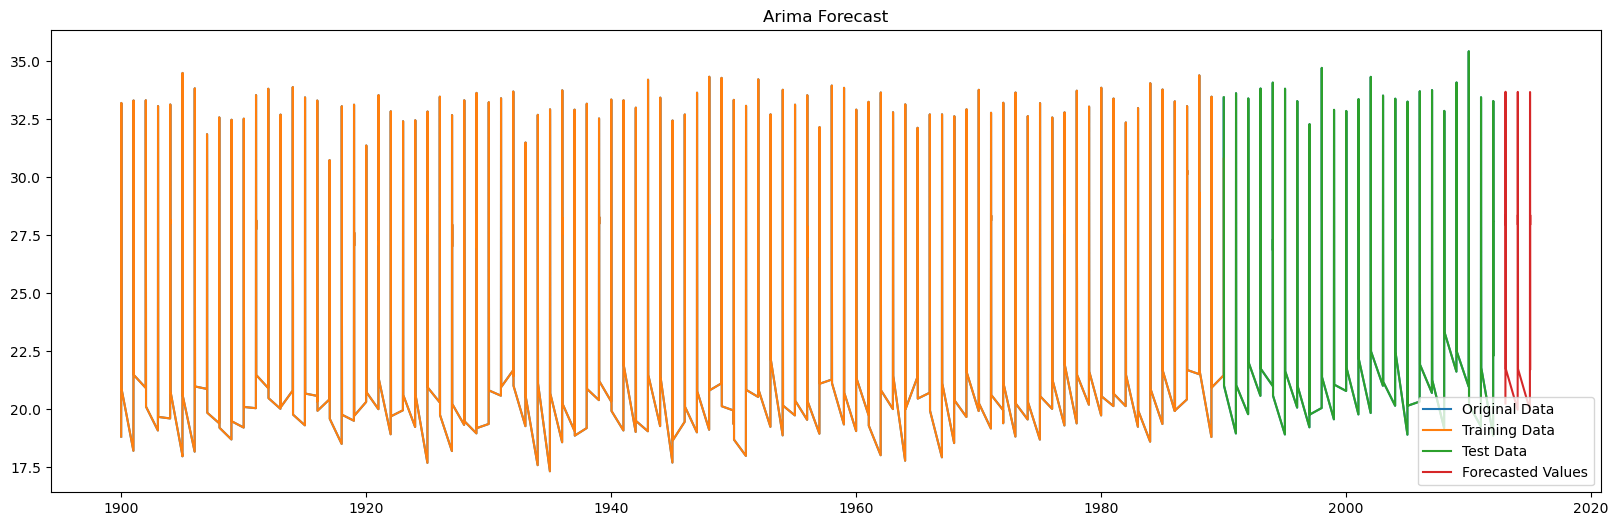

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1164.588, Time=2.71 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3693.470, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2912.042, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3691.486, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=11.20 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1264.653, Time=10.10 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2718.992, Time=0.47 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=8.56 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1443.217, Time=9.38 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=13.41 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1165.822, Time=2.20 se

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-packages\stat

mse: 0.26833306240181864
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 0.228462479857955


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Bangalore
            Future_forecast
Date                       
2013-01-01        24.141495
2013-01-02        25.994113
2013-01-03        28.257780
2013-01-04        29.079304
2013-01-05        28.694560
2013-01-06        26.683281
2013-01-07        25.778544
2013-01-08        25.670711
2013-01-09        25.973873
2013-01-10        25.592377
2013-01-11        24.752928
2013-01-12        23.735420
2014-01-01        24.164012
2014-01-02        26.052454
2014-01-03        28.321995
2014-01-04        29.144258
2014-01-05        28.760030
2014-01-06        26.750662
2014-01-07        25.846599
2014-01-08        25.738590
2014-01-09        26.041148
2014-01-10        25.659783
2014-01-11        24.820959
2014-01-12        23.804275
2015-01-01        24.232169
2015-01-02        26.118377
2015-01-03        28.385291
2015-01-04        29.206465
2015-01-05        28.822435
2015-01-06        26.814991
2015-01-07        25.911690
2015-01-08        25.803608
2015-01-09        26.105666
2015-01-10

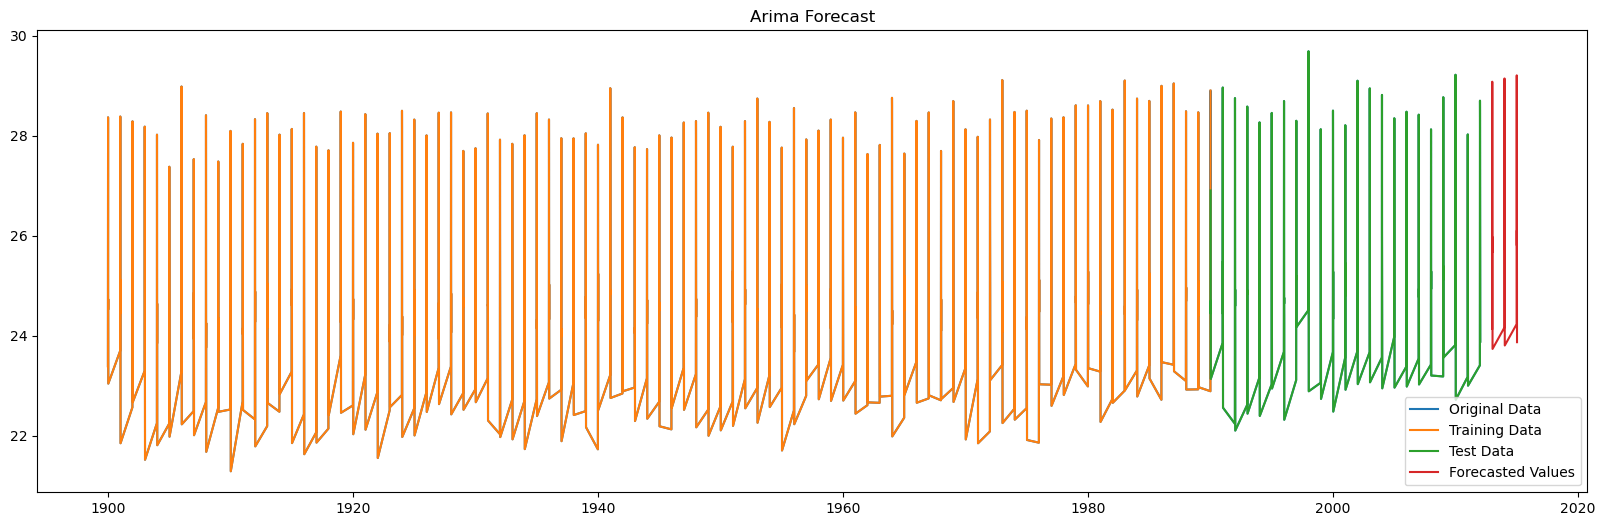

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3709.682, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2668.297, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3237.650, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3707.685, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3593.397, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3242.609, Time=0.35 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=6.46 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2760.208, Time=0.32 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2625.355, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=3455.782, Time=0.11 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.49 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


mse: 1.9572406754604201
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 0.4594446307145268


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Bombay
            Future_forecast
Date                       
2013-01-01        24.385901
2013-01-02        25.120086
2013-01-03        25.792413
2013-01-04        27.897533
2013-01-05        28.617772
2013-01-06        28.402684
2013-01-07        27.691798
2013-01-08        27.263951
2013-01-09        27.322208
2013-01-10        28.296152
2013-01-11        27.316552
2013-01-12        26.732513
2014-01-01        24.701499
2014-01-02        25.321922
2014-01-03        25.882278
2014-01-04        27.637369
2014-01-05        28.236186
2014-01-06        28.057399
2014-01-07        27.465205
2014-01-08        27.108900
2014-01-09        27.157455
2014-01-10        27.971035
2014-01-11        27.150803
2014-01-12        26.662312
2015-01-01        24.963851
2015-01-02        25.483200
2015-01-03        25.951955
2015-01-04        27.419874
2015-01-05        27.920605
2015-01-06        27.771031
2015-01-07        27.275749
2015-01-08        26.977783
2015-01-09        27.018415
2015-01-10   

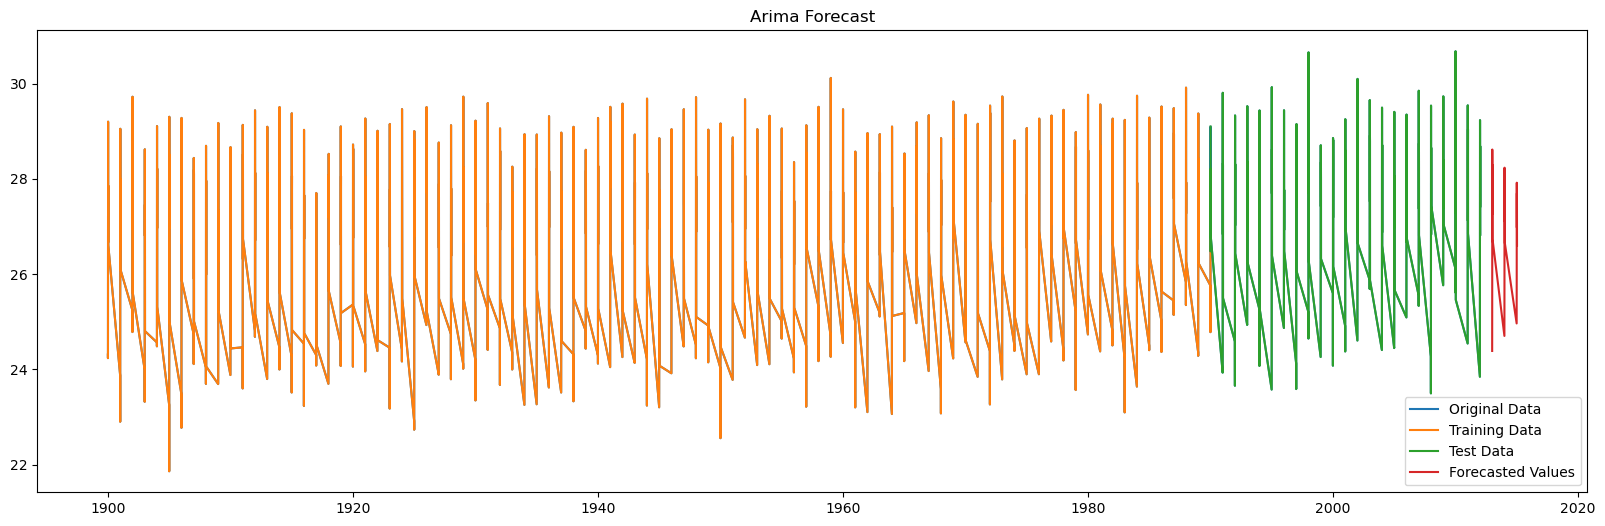

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6191.013, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4533.471, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10189.071, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5204.201, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2650.579, Time=2.06 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3061.277, Time=1.35 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=6.44 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2736.352, Time=6.97 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4144.473, Time=2.50 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=4.19 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.40 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2783.857, Time=1.55

C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(2,0,1)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(1,0,2)[12]             : AIC=inf, Time=9.34 sec
 ARIMA(2,0,0)(1,0,2)[12]             : AIC=inf, Time=9.36 sec
 ARIMA(3,0,1)(1,0,2)[12]             : AIC=2482.457, Time=7.85 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(2,0,2)(1,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,0,2)(1,0,2)[12]             : AIC=inf, Time=8.73 sec
 ARIMA(3,0,0)(1,0,2)[12]             : AIC=inf, Time=6.33 sec
 ARIMA(3,0,2)(1,0,2)[12]             : AIC=2468.157, Time=9.53 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=3646.604, Time=8.20 sec

Best model:  ARIMA(2,0,1)(1,0,2)[12]          
Total fit time: 208.268 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\s

mse: 0.591843907497404
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 0.527407052966554


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Calcutta
            Future_forecast
Date                       
2013-01-01        18.981052
2013-01-02        22.678279
2013-01-03        27.535328
2013-01-04        30.533925
2013-01-05        31.114665
2013-01-06        30.419241
2013-01-07        29.433468
2013-01-08        29.521519
2013-01-09        29.328157
2013-01-10        27.749298
2013-01-11        24.302711
2013-01-12        20.145818
2014-01-01        19.059667
2014-01-02        22.678568
2014-01-03        27.559532
2014-01-04        30.514345
2014-01-05        31.180600
2014-01-06        30.512452
2014-01-07        29.448602
2014-01-08        29.533839
2014-01-09        29.346917
2014-01-10        27.730470
2014-01-11        24.251812
2014-01-12        20.112677
2015-01-01        19.054919
2015-01-02        22.678143
2015-01-03        27.559029
2015-01-04        30.513400
2015-01-05        31.179536
2015-01-06        30.511508
2015-01-07        29.447854
2015-01-08        29.533057
2015-01-09        29.346155
2015-01-10 

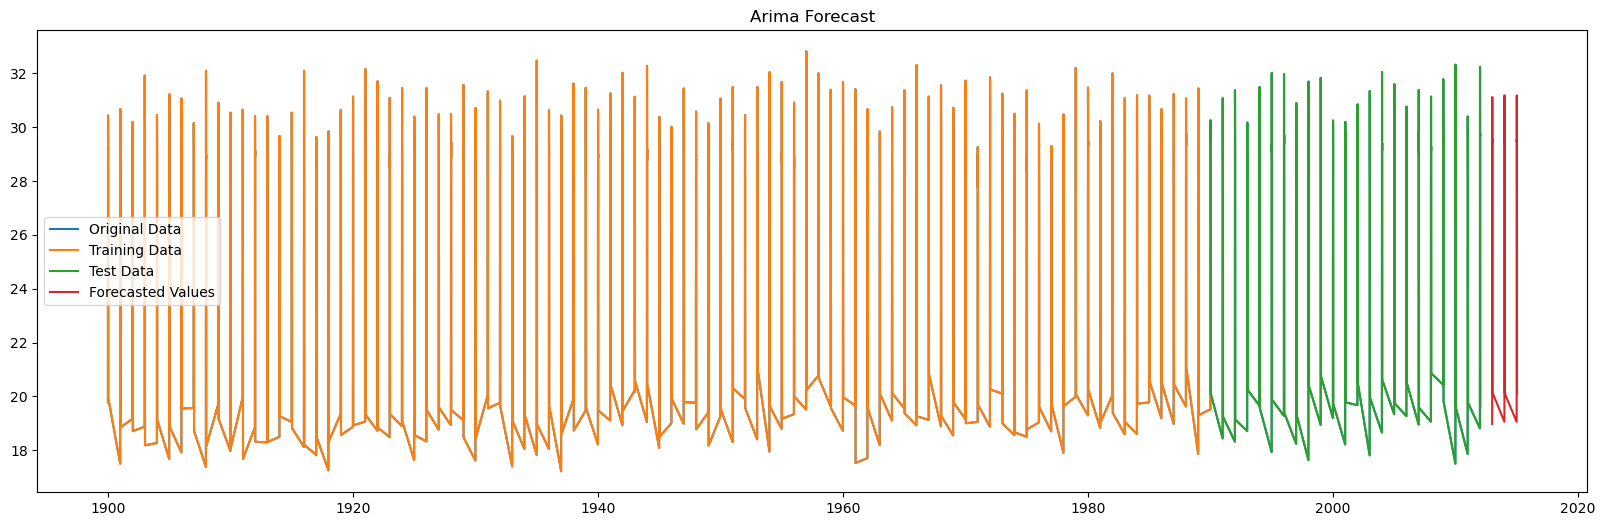

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7233.586, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5419.280, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10155.996, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=6131.213, Time=0.19 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4969.374, Time=2.63 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3514.297, Time=7.79 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=9.18 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=5.47 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=4026.333, Time=7.14 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=3279.548, Time=8.47 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=4714.246, Time=3.67 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=4511.779, Time=0.86 sec
 ARIMA(1,0,1)(2,0,2)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\s

mse: 1.2473558001164724
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 1.1148356059698794


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Delhi
            Future_forecast
Date                       
2013-01-01        14.474659
2013-01-02        18.334328
2013-01-03        24.265109
2013-01-04        30.112416
2013-01-05        33.991943
2013-01-06        34.038320
2013-01-07        31.526827
2013-01-08        30.343292
2013-01-09        29.603218
2013-01-10        26.774033
2013-01-11        21.576723
2013-01-12        16.315704
2014-01-01        14.432538
2014-01-02        18.269185
2014-01-03        24.231582
2014-01-04        30.064926
2014-01-05        34.009478
2014-01-06        34.145798
2014-01-07        31.565558
2014-01-08        30.309917
2014-01-09        29.603890
2014-01-10        26.746936
2014-01-11        21.550822
2014-01-12        16.324793
2015-01-01        14.429677
2015-01-02        18.265158
2015-01-03        24.225813
2015-01-04        30.057461
2015-01-05        34.000845
2015-01-06        34.137056
2015-01-07        31.557462
2015-01-08        30.302109
2015-01-09        29.596224
2015-01-10    

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


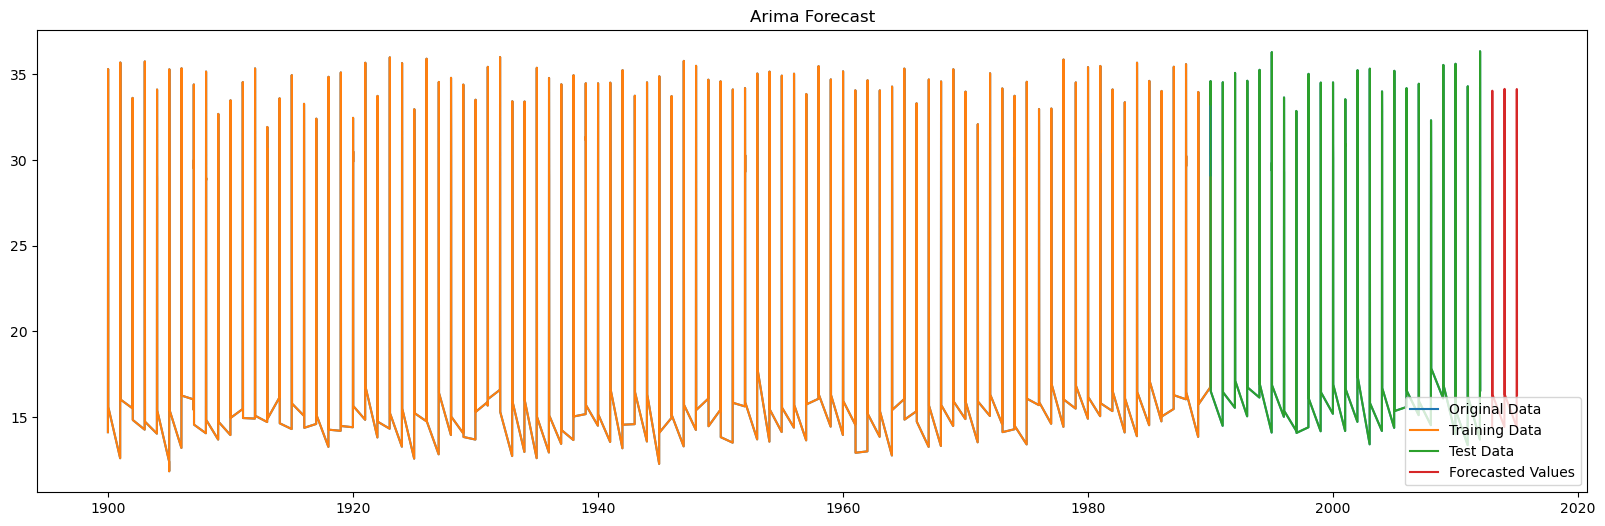

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5671.022, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4087.072, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10243.920, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4719.851, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3365.576, Time=2.79 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3451.279, Time=1.39 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=7.53 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2515.043, Time=8.19 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3713.656, Time=2.33 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.84 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=2871.238, Time=6.61 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=7.84

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\s

mse: 0.5385223440741705
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 0.5428544176567173


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Hyderabad
            Future_forecast
Date                       
2013-01-01        24.701837
2013-01-02        27.414883
2013-01-03        30.720572
2013-01-04        33.233640
2013-01-05        34.605635
2013-01-06        31.632953
2013-01-07        29.149348
2013-01-08        28.428659
2013-01-09        28.645815
2013-01-10        27.745283
2013-01-11        25.751505
2013-01-12        23.993651
2014-01-01        24.665575
2014-01-02        27.376392
2014-01-03        30.686542
2014-01-04        33.167637
2014-01-05        34.595019
2014-01-06        31.643307
2014-01-07        29.095460
2014-01-08        28.389525
2014-01-09        28.605230
2014-01-10        27.680312
2014-01-11        25.705571
2014-01-12        24.003005
2015-01-01        24.674606
2015-01-02        27.384324
2015-01-03        30.693148
2015-01-04        33.173232
2015-01-05        34.600005
2015-01-06        31.649351
2015-01-07        29.102409
2015-01-08        28.396677
2015-01-09        28.612236
2015-01-10

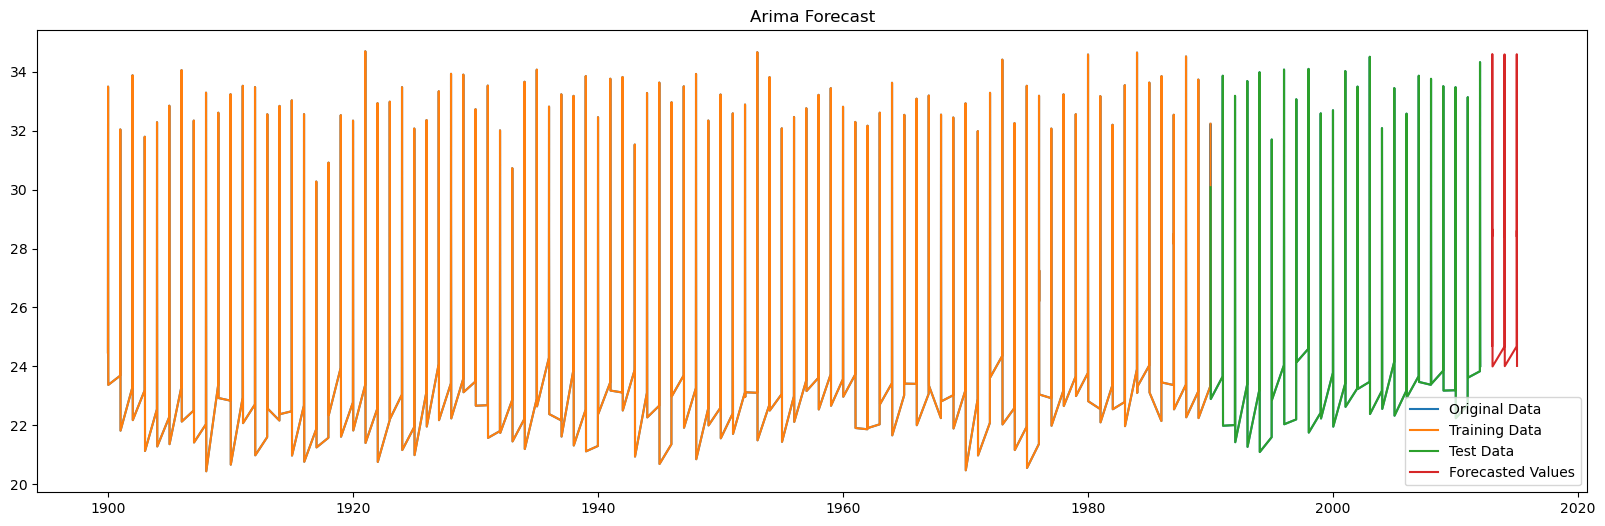

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7027.265, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5297.258, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10162.849, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5974.581, Time=0.18 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3381.611, Time=2.34 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3891.613, Time=1.18 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=6.92 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(1,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4869.510, Time=2.19 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=3663.320, Time=8.00 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.55 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(0,0,1)(1,0,1)[12]             : AIC=3343.965, Time=1.75 sec
 ARIMA(0,0,1)(0,0,1)[12]             : AIC=7572.912, Time=0.94 sec
 ARIMA(0,0,1)(1,0,0)[12]             : AIC=3946.370, Time=0.35 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(0,0,1)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(1,0,2)[12]             : AIC=inf, Time=6.35 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=8756.319, Time=0.16 sec
 ARIMA(0,0,1)(0,0,2)[12]             : AIC=6820.751, Time=3.50 sec
 ARIMA(0,0,1)(2,0,0)[12]             : AIC=3661.254, Time=1.63 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(0,0,1)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(1,0,1)[12]             : AIC=3475.098, Time=0.98 sec
 ARIMA(1,0,1)(1,0,1)[12]             : AIC=3361.907, Time=2.26 sec
 ARIMA(0,0,2)(1,0,1)[12]             : AIC=3345.290, Time=2.77 sec
 ARIMA(1,0,0)(1,0,1)[12]             : AIC=3336.865, Time=1.73 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=5289.366, Time=0.32 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(2,0,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(1,0,0)(1,0,2)[12]             : AIC=10.000, Time=5.80 sec
 ARIMA(1,0,0)(0,0,2)[12]             : AIC=4901.361, Time=1.25 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,0)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(1,0,0)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(1,0,2)[12]             : AIC=inf, Time=15.11 sec
 ARIMA(2,0,0)(1,0,2)[12]             : AIC=inf, Time=5.18 sec
 ARIMA(1,0,1)(1,0,2)[12]             : AIC=inf, Time=6.13 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,1)(1,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(2,0,1)(1,0,2)[12]             : AIC=inf, Time=nan sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,0)(1,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(1,0,2)[12]          
Total fit time: 130.293 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\ana

mse: 722.3554442463236
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 1.097393205604643


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Jaipur
            Future_forecast
Date                       
2013-01-01        15.934876
2013-01-02        19.433720
2013-01-03        25.328117
2013-01-04        30.627113
2013-01-05        34.597752
2013-01-06        33.790296
2013-01-07        30.533909
2013-01-08        28.886428
2013-01-09        28.816306
2013-01-10        26.882562
2013-01-11        22.203700
2013-01-12        17.578555
2014-01-01        15.792396
2014-01-02        19.358035
2014-01-03        25.294918
2014-01-04        30.603801
2014-01-05        34.583761
2014-01-06        33.805170
2014-01-07        30.548474
2014-01-08        28.873490
2014-01-09        28.805767
2014-01-10        26.868162
2014-01-11        22.191706
2014-01-12        17.582891
2015-01-01        15.792674
2015-01-02        19.356306
2015-01-03        25.291854
2015-01-04        30.599836
2015-01-05        34.579197
2015-01-06        33.800685
2015-01-07        30.544413
2015-01-08        28.869649
2015-01-09        28.801934
2015-01-10   

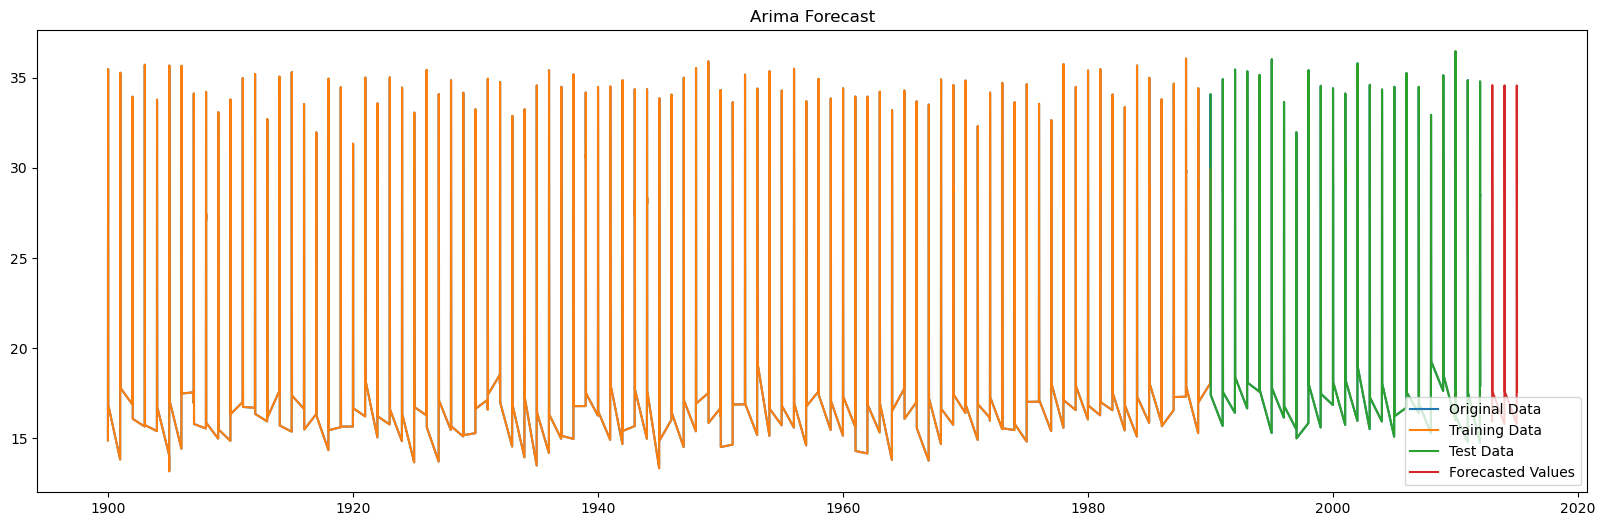

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.49 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7111.715, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5309.494, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10116.435, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=6015.866, Time=0.17 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3060.622, Time=2.54 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3661.032, Time=1.33 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=6.23 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3242.917, Time=7.77 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4843.549, Time=2.49 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(2,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.70 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3071.277, Time=2.89 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.45 sec
 ARIMA(0,0,1)(1,0,1)[12]             : AIC=3116.077, Time=0.79 sec

Best model:  ARIMA(0,0,1)(1,0,1)[12] intercept
Total fit time: 53.390 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-pack

mse: 0.9472948507483047
Training data size: 1084
Testing data size: 272
mse_hw: 0.9169890204680258


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Kanpur
            Future_forecast
Date                       
2013-01-01        14.596666
2013-01-02        18.677303
2013-01-03        24.437684
2013-01-04        30.124079
2013-01-05        33.227740
2013-01-06        33.089081
2013-01-07        30.225292
2013-01-08        29.493629
2013-01-09        28.833739
2013-01-10        25.872851
2013-01-11        20.949841
2013-01-12        16.198364
2014-01-01        14.614010
2014-01-02        18.676581
2014-01-03        24.436739
2014-01-04        30.122914
2014-01-05        33.226456
2014-01-06        33.087802
2014-01-07        30.224124
2014-01-08        29.492489
2014-01-09        28.832625
2014-01-10        25.871851
2014-01-11        20.949031
2014-01-12        16.197738
2015-01-01        14.613445
2015-01-02        18.675859
2015-01-03        24.435795
2015-01-04        30.121750
2015-01-05        33.225171
2015-01-06        33.086523
2015-01-07        30.222955
2015-01-08        29.491349
2015-01-09        28.831510
2015-01-10   

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


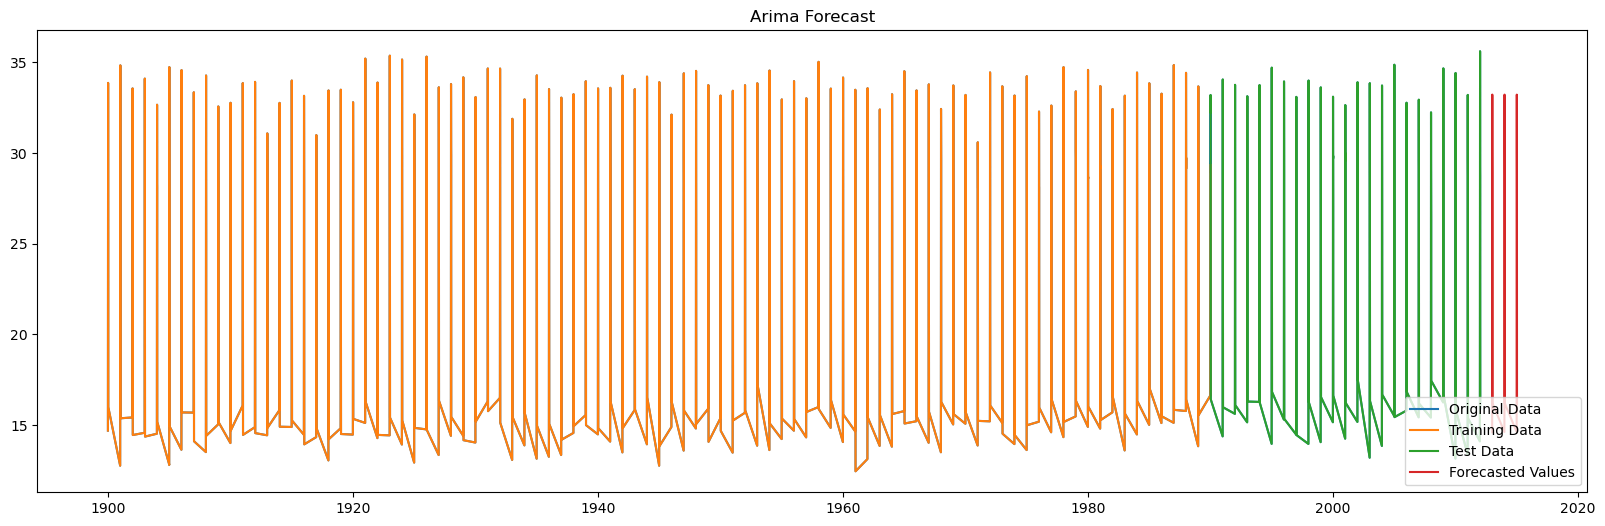

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7111.715, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5309.494, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10116.435, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=6015.866, Time=0.16 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3060.622, Time=2.68 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3661.032, Time=1.38 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=6.50 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3242.917, Time=8.17 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4843.549, Time=2.72 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(2,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.57 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3071.277, Time=2.90 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.29 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.45 sec
 ARIMA(0,0,1)(1,0,1)[12]             : AIC=3116.077, Time=0.79 sec

Best model:  ARIMA(0,0,1)(1,0,1)[12] intercept
Total fit time: 54.870 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-pack

mse: 0.9472948507483047
Training data size: 1084
Testing data size: 272
mse_hw: 0.9169890204680258
Lakhnau
            Future_forecast
Date                       
2013-01-01        14.596666
2013-01-02        18.677303
2013-01-03        24.437684
2013-01-04        30.124079
2013-01-05        33.227740
2013-01-06        33.089081
2013-01-07        30.225292
2013-01-08        29.493629
2013-01-09        28.833739
2013-01-10        25.872851
2013-01-11        20.949841
2013-01-12        16.198364
2014-01-01        14.614010
2014-01-02        18.676581
2014-01-03        24.436739
2014-01-04        30.122914
2014-01-05        33.226456
2014-01-06        33.087802
2014-01-07        30.224124
2014-01-08        29.492489
2014-01-09        28.832625
2014-01-10        25.871851
2014-01-11        20.949031
2014-01-12        16.197738
2015-01-01        14.613445
2015-01-02        18.675859
2015-01-03        24.435795
2015-01-04        30.121750
2015-01-05        33.225171
2015-01-06        33.0865

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


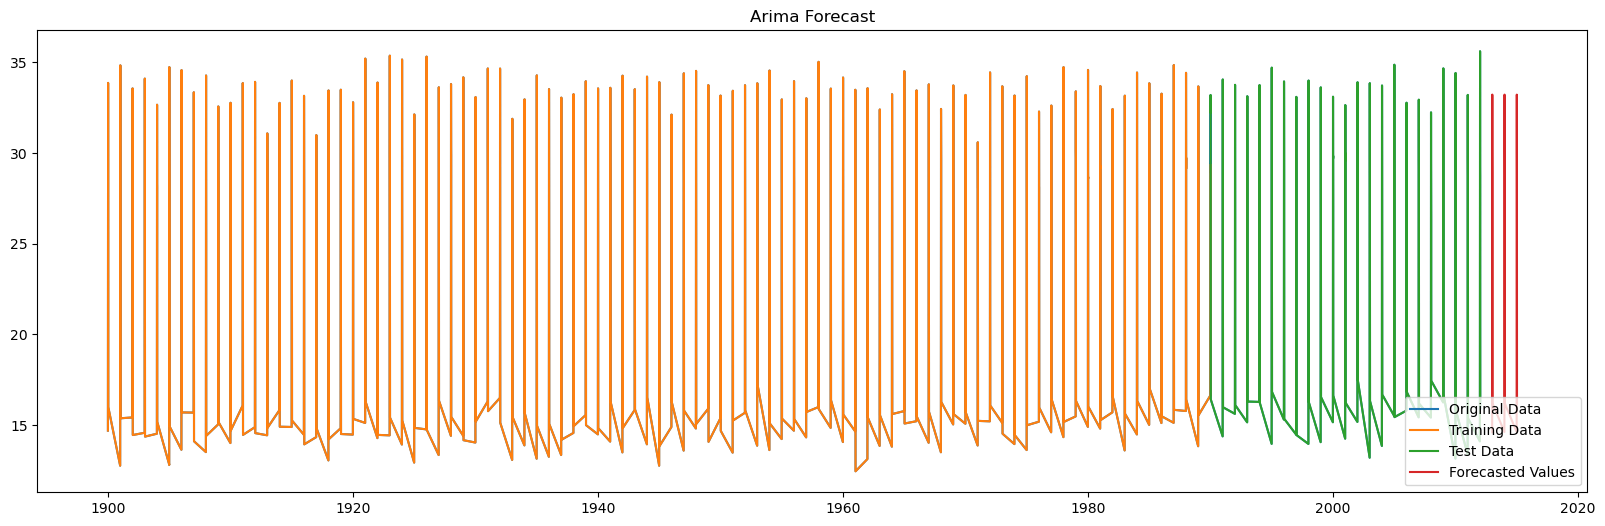

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2403.230, Time=3.27 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5347.863, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3668.970, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10357.902, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2747.749, Time=2.59 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3493.999, Time=3.53 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=9.12 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=2658.261, Time=9.59 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2991.602, Time=1.03 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2614.707, Time=9.41 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=11.84 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=2646.351, Time=11.86 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Ti

C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,0,1)(1,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(3,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=10.79 sec
 ARIMA(3,0,1)(1,0,2)[12] intercept   : AIC=2249.285, Time=11.64 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=3162.039, Time=0.85 sec
 ARIMA(3,0,1)(0,0,2)[12] intercept   : AIC=2646.992, Time=8.37 sec
 ARIMA(3,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=12.20 sec
 ARIMA(3,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=11.04 sec
 ARIMA(3,0,0)(1,0,1)[12] intercept   : AIC=2881.296, Time=2.77 sec
 ARIMA(4,0,1)(1,0,1)[12] intercept   : AIC=2749.175, Time=3.35 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2483.725, Time=1.99 sec
 ARIMA(4,0,0)(1,0,1)[12] intercept   : AIC=2780.107, Time=2.50 sec
 ARIMA(4,0,2)(1,0,1)[12] intercept   : AIC=2982.856, Time=3.21 sec
 ARIMA(3,0,1)(1,0,1)[12]             : AIC=inf, Time=1.84 sec

Best model:  ARIMA(3,0,1)(1,0,1)[12] intercept
Total fit time: 158.731 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\sit

mse: 0.39129022311029565
Training data size: 1084
Testing data size: 272
mse_hw: 0.3530617063159804


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Madras
            Future_forecast
Date                       
2013-01-01        25.786575
2013-01-02        27.239084
2013-01-03        29.384897
2013-01-04        31.578001
2013-01-05        33.791774
2013-01-06        33.263114
2013-01-07        31.849465
2013-01-08        31.161288
2013-01-09        30.744685
2013-01-10        29.122331
2013-01-11        27.155756
2013-01-12        25.606512
2014-01-01        25.643011
2014-01-02        27.169741
2014-01-03        29.356402
2014-01-04        31.561278
2014-01-05        33.779222
2014-01-06        33.252356
2014-01-07        31.839698
2014-01-08        31.151926
2014-01-09        30.735517
2014-01-10        29.113645
2014-01-11        27.147629
2014-01-12        25.598823
2015-01-01        25.635317
2015-01-02        27.161626
2015-01-03        29.347682
2015-01-04        31.551947
2015-01-05        33.769278
2015-01-06        33.242562
2015-01-07        31.830300
2015-01-08        31.142723
2015-01-09        30.726433
2015-01-10   

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


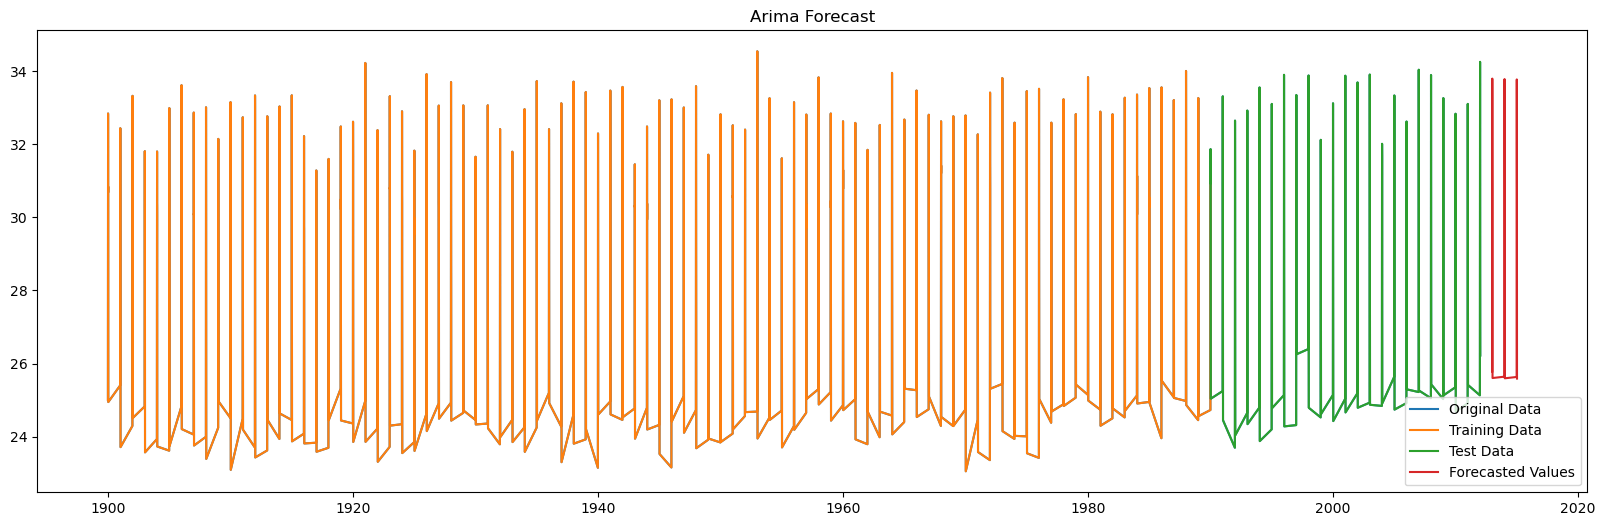

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6431.848, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4856.531, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10162.402, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5474.543, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2917.433, Time=2.40 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3551.942, Time=1.03 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=6.96 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3145.253, Time=6.68 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4491.718, Time=2.25 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=3248.195, Time=7.69 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=7.67 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.51

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-pack

mse: 0.8905821018671539
Training data size: 1084
Testing data size: 272
mse_hw: 0.8670486057039455
Nagpur
            Future_forecast
Date                       
2013-01-01        19.625556
2013-01-02        22.578568
2013-01-03        27.261358
2013-01-04        31.733473
2013-01-05        34.787094
2013-01-06        31.611557
2013-01-07        27.182829
2013-01-08        26.454904
2013-01-09        27.132503
2013-01-10        25.773898
2013-01-11        22.741291
2013-01-12        20.014300
2014-01-01        19.465947
2014-01-02        22.575753
2014-01-03        27.257959
2014-01-04        31.729516
2014-01-05        34.782757
2014-01-06        31.607616
2014-01-07        27.179440
2014-01-08        26.451606
2014-01-09        27.129120
2014-01-10        25.770685
2014-01-11        22.738455
2014-01-12        20.011805
2015-01-01        19.463520
2015-01-02        22.572939
2015-01-03        27.254561
2015-01-04        31.725561
2015-01-05        34.778421
2015-01-06        31.60367

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


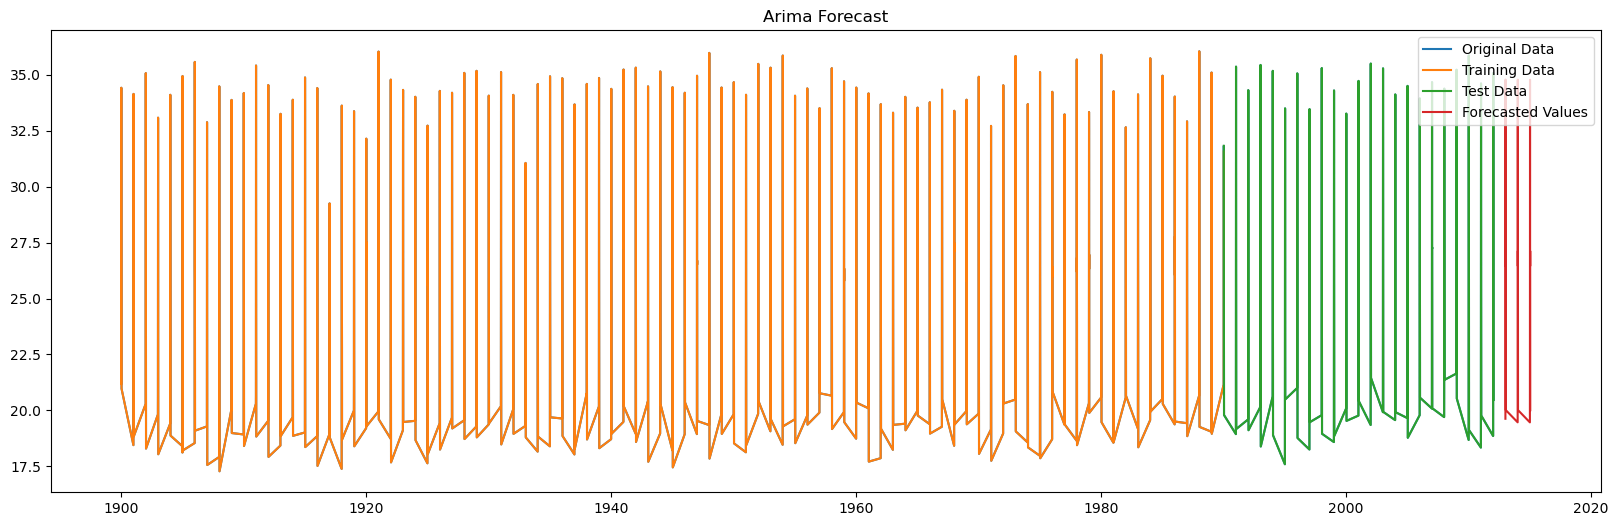

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7233.586, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5419.280, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10155.996, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=6131.213, Time=0.21 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4969.374, Time=2.57 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3514.297, Time=7.45 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.87 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=5.40 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=4026.333, Time=6.70 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=3279.548, Time=7.91 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=4714.246, Time=3.25 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=4511.779, Time=0.83 sec
 ARIMA(1,0,1)(2,0,2)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\s

mse: 1.2473558001164724
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 1.1148356059698794


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


New Delhi
            Future_forecast
Date                       
2013-01-01        14.474659
2013-01-02        18.334328
2013-01-03        24.265109
2013-01-04        30.112416
2013-01-05        33.991943
2013-01-06        34.038320
2013-01-07        31.526827
2013-01-08        30.343292
2013-01-09        29.603218
2013-01-10        26.774033
2013-01-11        21.576723
2013-01-12        16.315704
2014-01-01        14.432538
2014-01-02        18.269185
2014-01-03        24.231582
2014-01-04        30.064926
2014-01-05        34.009478
2014-01-06        34.145798
2014-01-07        31.565558
2014-01-08        30.309917
2014-01-09        29.603890
2014-01-10        26.746936
2014-01-11        21.550822
2014-01-12        16.324793
2015-01-01        14.429677
2015-01-02        18.265158
2015-01-03        24.225813
2015-01-04        30.057461
2015-01-05        34.000845
2015-01-06        34.137056
2015-01-07        31.557462
2015-01-08        30.302109
2015-01-09        29.596224
2015-01-10

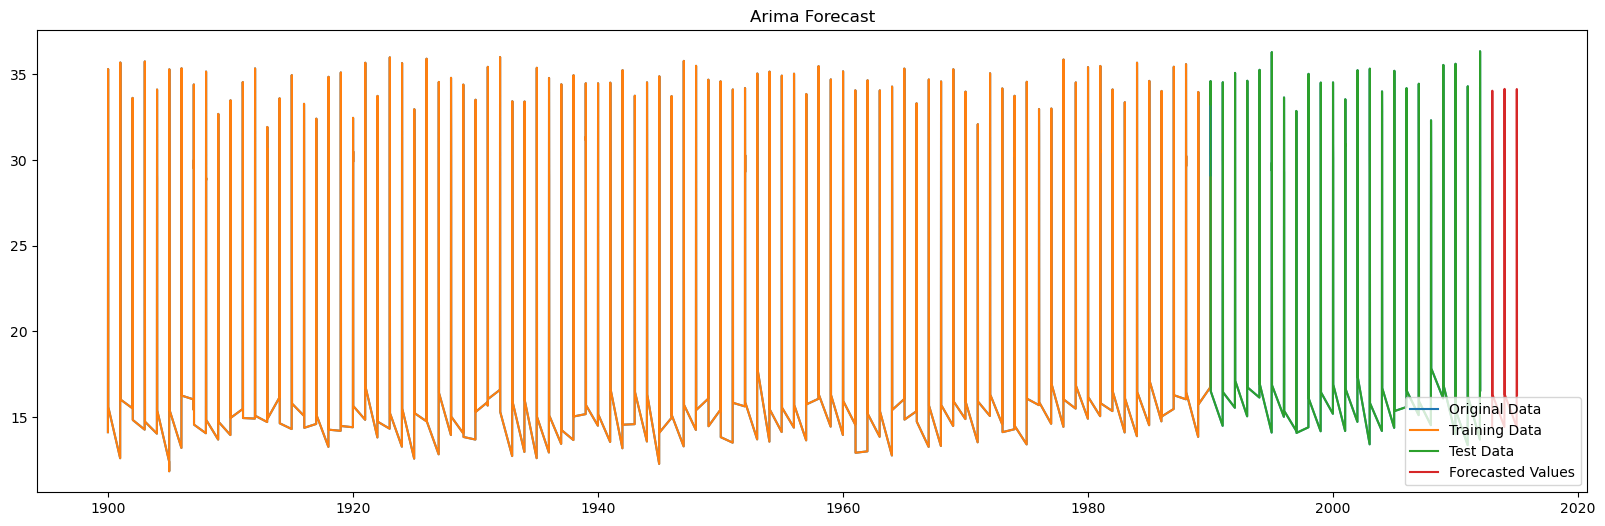

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.46 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5453.402, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3922.607, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10055.148, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4536.591, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2521.241, Time=2.85 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2753.858, Time=1.35 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=7.44 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2438.676, Time=7.11 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3562.930, Time=1.76 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=7.78 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=2672.053, Time=6.14 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=7.97

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\HP\anaconda3\lib\site-p

mse: 0.73959549607386
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 0.6555316956531665


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Pune
            Future_forecast
Date                       
2013-01-01        21.566728
2013-01-02        22.647599
2013-01-03        25.957613
2013-01-04        33.302573
2013-01-05        31.857555
2013-01-06        22.369808
2013-01-07        25.619736
2013-01-08        21.262486
2013-01-09        23.943939
2013-01-10        28.602530
2013-01-11        23.549737
2013-01-12        20.394870
2014-01-01        20.910272
2014-01-02        23.210550
2014-01-03        26.733562
2014-01-04        29.609732
2014-01-05        30.402104
2014-01-06        27.226310
2014-01-07        25.161601
2014-01-08        24.455259
2014-01-09        25.053463
2014-01-10        25.189346
2014-01-11        23.109347
2014-01-12        20.873925
2015-01-01        20.948636
2015-01-02        23.211934
2015-01-03        26.730704
2015-01-04        29.606566
2015-01-05        30.398853
2015-01-06        27.223399
2015-01-07        25.158910
2015-01-08        24.452644
2015-01-09        25.050784
2015-01-10     

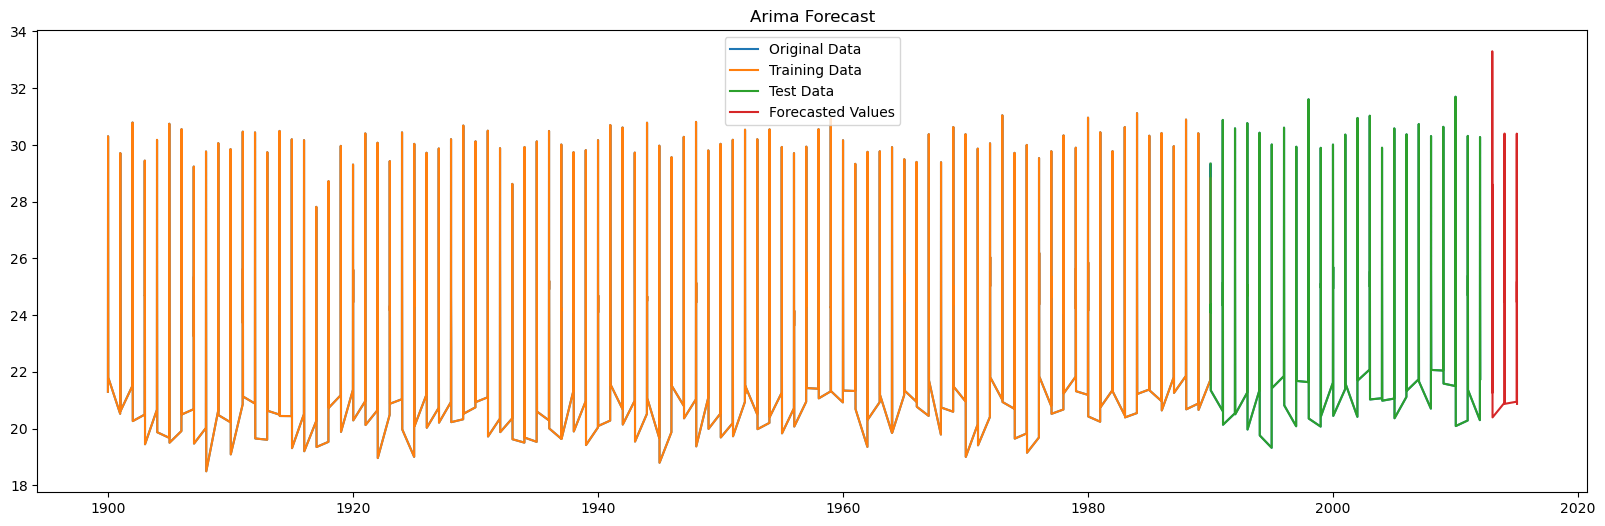

Training data size: 1084
Testing data size: 272
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.42 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5992.792, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4388.842, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10204.395, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5024.449, Time=0.12 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2648.693, Time=2.69 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3118.034, Time=1.28 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=8.03 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2921.288, Time=6.99 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4025.725, Time=2.25 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=2972.026, Time=9.74 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=8.16 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.33

C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(0,0,1)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(1,0,2)[12]             : AIC=inf, Time=7.90 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=8776.437, Time=0.16 sec
 ARIMA(0,0,1)(0,0,2)[12]             : AIC=6671.872, Time=3.84 sec
 ARIMA(0,0,1)(2,0,0)[12]             : AIC=2908.701, Time=1.89 sec
 ARIMA(0,0,1)(2,0,2)[12]             : AIC=inf, Time=90.27 sec
 ARIMA(0,0,0)(1,0,1)[12]             : AIC=2759.215, Time=1.98 sec
 ARIMA(1,0,1)(1,0,1)[12]             : AIC=inf, Time=1.90 sec
 ARIMA(0,0,2)(1,0,1)[12]             : AIC=2599.191, Time=2.79 sec
 ARIMA(0,0,2)(0,0,1)[12]             : AIC=6716.643, Time=1.67 sec
 ARIMA(0,0,2)(1,0,0)[12]             : AIC=3175.863, Time=0.60 sec


C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,2)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\HP\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\HP\anaconda3\

 ARIMA(0,0,2)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,0,2)(1,0,2)[12]             : AIC=inf, Time=10.05 sec
 ARIMA(0,0,2)(0,0,0)[12]             : AIC=7605.299, Time=0.33 sec
 ARIMA(0,0,2)(0,0,2)[12]             : AIC=6040.044, Time=4.52 sec
 ARIMA(0,0,2)(2,0,0)[12]             : AIC=2894.789, Time=2.47 sec
 ARIMA(0,0,2)(2,0,2)[12]             : AIC=inf, Time=19.58 sec
 ARIMA(1,0,2)(1,0,1)[12]             : AIC=inf, Time=7.79 sec
 ARIMA(0,0,3)(1,0,1)[12]             : AIC=2606.743, Time=2.00 sec
 ARIMA(1,0,3)(1,0,1)[12]             : AIC=inf, Time=7.56 sec

Best model:  ARIMA(0,0,2)(1,0,1)[12]          
Total fit time: 243.758 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-pack

mse: 0.6138054337625777
Training data size: 1084
Testing data size: 272


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
C:\Users\HP\AppData\Local\Temp\ipykernel_15644\3922707794.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_Select=Model_Select.append(Accuracy[

mse_hw: 0.6109301832489772


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Surat
            Future_forecast
Date                       
2013-01-01        20.827313
2013-01-02        23.757618
2013-01-03        28.149333
2013-01-04        31.349695
2013-01-05        32.709954
2013-01-06        31.170237
2013-01-07        28.542165
2013-01-08        27.650800
2013-01-09        27.936934
2013-01-10        27.507625
2013-01-11        24.810890
2013-01-12        21.718540
2014-01-01        20.599265
2014-01-02        23.597449
2014-01-03        28.145673
2014-01-04        31.345618
2014-01-05        32.705701
2014-01-06        31.166185
2014-01-07        28.538454
2014-01-08        27.647205
2014-01-09        27.933302
2014-01-10        27.504048
2014-01-11        24.807665
2014-01-12        21.715717
2015-01-01        20.596587
2015-01-02        23.594380
2015-01-03        28.142014
2015-01-04        31.341543
2015-01-05        32.701449
2015-01-06        31.162132
2015-01-07        28.534744
2015-01-08        27.643611
2015-01-09        27.929670
2015-01-10    

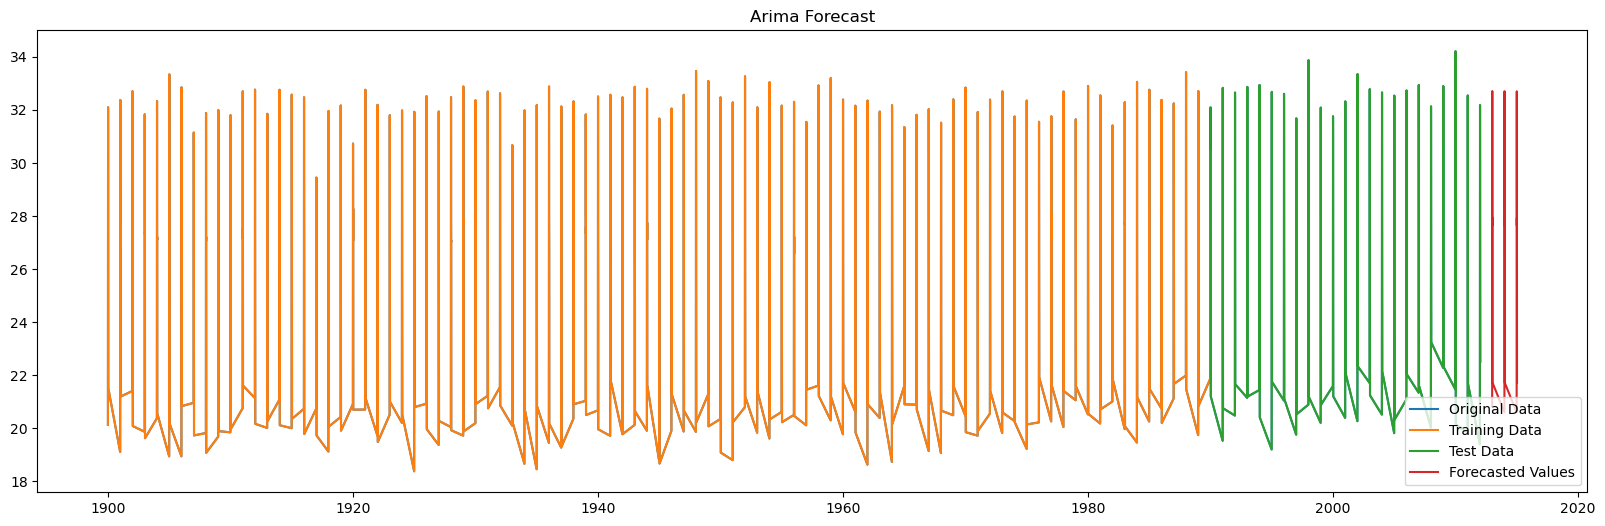

In [29]:
# Automated loop
Accuracy=pd.DataFrame([])
for i in range(0 , len(combination)):
    data=locals()[combination[i]]
    
        #Creating DataFrame for ARIMA model
    df_arima=data.copy()

    #Creating Test and Train Data
    train_arima, test_arima = train_test_split(df_arima, test_size=0.2, shuffle=False)
    print("Training data size:", len(train_arima))
    print("Testing data size:", len(test_arima))

    #Find Best ARIMA Model
    model_ar = auto_arima(train_arima['Avg_Temp'], seasonal=True, m=12, trace=True)
    model_ar.summary()

    #On Best ARIMA model Fitting Model
    model_train=sm.tsa.statespace.SARIMAX(train_arima['Avg_Temp'],order=model_ar.order,seasonal_order=model_ar.seasonal_order)
    model_train_fit=model_train.fit()
    model_train_fit.summary()

    #Predict The ARIMA Model
    test_pred_arima=pd.DataFrame(model_train_fit.forecast(len(test_arima)))
    test_pred_arima=test_pred_arima.set_index(test_arima.index)
    test_pred_arima

    # Calculate Mean Squared Error (MSE)--Check accuracy of ARIMA Model
    mse_arima = mean_squared_error(test_arima.Avg_Temp , test_pred_arima.predicted_mean)
    print("mse:", mse_arima)


    #Holt-Winter
    #Creating DataFrame for Holt-Winter model
    df_hw=data.copy()

    #Creating Test and Train Data
    train_hw, test_hw = train_test_split(df_hw, test_size=0.2, shuffle=False)
    print("Training data size:", len(train_hw))
    print("Testing data size:", len(test_hw))

    # Chech Next Model Hoit-Winters
    model_hw = ExponentialSmoothing(train_hw['Avg_Temp'], trend='add', seasonal='add', seasonal_periods=12)
    model_hw_fit = model_hw.fit()
    

    #Predict the ExponentialSmoothing Model
    test_pred_hw=pd.DataFrame(model_hw_fit.forecast(len(test_hw)))
    test_pred_hw=test_pred_hw.set_index(test_hw.index)
    test_pred_hw.columns=["pre"]
    test_pred_hw

    # Calculate Mean Squared Error (MSE)--Check accuracy of HW Model
    mse_hw = mean_squared_error(test_pred_hw.pre , test_hw.Avg_Temp)
    print("mse_hw:", mse_hw)


    ## Accuracy table
    
    Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
                                           "model":"Arima",
                                           "mse_score":mse_arima
                                           }, index=[0]), ignore_index=True)
    
    Accuracy=Accuracy.append(pd.DataFrame({"page":combination[i],
                                           "model":"Holt Winter",
                                           "mse_score":mse_hw
                                           }, index=[0]), ignore_index=True)
    
    ## model selection
    Model_Select=pd.DataFrame()
    Model_Select=Model_Select.append(Accuracy[Accuracy.mse_score == Accuracy.mse_score.max()])
    
    ## Final Forecasting using best selected model
    if (Model_Select["model"]=="Arima").any():
        
        
        final_model_ar = SARIMAX(df_arima.Avg_Temp, order = model_ar.order , seasonal_order=model_ar.seasonal_order)
        final_model_ar_fit = final_model_ar.fit()




        import pandas as pd

        # Define the starting date
        start_date = pd.to_datetime('2013-01-01')

        # Create an empty list to store future dates
        future_dates = []

        # Generate next 12 months' dates starting from start_date
        current_date = start_date.replace(day=1)
        for _ in range(36):
            formatted_date = current_date.strftime('%Y-%d-%m')
            future_dates.append(formatted_date)
            current_date += pd.DateOffset(months=1)

        # Create a DataFrame from the list of future dates
        future_dates_df = pd.DataFrame(future_dates, columns=['Date'])

        # Output the future dates DataFrame
        final_pred_ar=pd.DataFrame(final_model_ar_fit.forecast(len(future_dates_df)))
        final_pred_ar=final_pred_ar.set_index(future_dates_df.Date)
        final_pred_ar=final_pred_ar.reset_index(drop=False)
        final_pred_ar["Date"]=pd.to_datetime(final_pred_ar["Date"])
        final_pred_ar=final_pred_ar.set_index("Date")
        
        final_pred_ar.columns=["Future_forecast"]
    # Plot the original data, training data, test data, and forecasted values--For 
        print(combination[i])
        print(final_pred_ar)
        
        plt.figure(figsize=(20, 6))
        plt.plot(df_arima.Avg_Temp, label='Original Data')
        plt.plot(train_arima.Avg_Temp, label='Training Data')
        plt.plot(test_arima.Avg_Temp, label='Test Data')
        plt.plot(final_pred_ar, label='Forecasted Values')

        plt.title('Arima Forecast')
        plt.legend()
        plt.show()
        
        
    else:
        
        final_model_hw = ExponentialSmoothing(df_hw['Avg_Temp'], trend='add', seasonal='add', seasonal_periods=12)
        final_model_hw_fit = final_model_hw.fit()




        import pandas as pd

        # Define the starting date
        start_date = pd.to_datetime('2013-01-01')

        # Create an empty list to store future dates
        future_dates = []

        # Generate next 12 months' dates starting from start_date
        current_date = start_date.replace(day=1)
        for _ in range(60):
            formatted_date = current_date.strftime('%Y-%d-%m')
            future_dates.append(formatted_date)
            current_date += pd.DateOffset(months=1)

        # Create a DataFrame from the list of future dates
        future_dates_df = pd.DataFrame(future_dates, columns=['Date'])

        # Output the future dates DataFrame
        final_pred_hw=pd.DataFrame(final_model_hw_fit.forecast(len(future_dates_df)))
        final_pred_hw=final_pred_hw.set_index(future_dates_df.Date)
        final_pred_hw=final_pred_hw.reset_index(drop=False)
        final_pred_hw["Date"]=pd.to_datetime(final_pred_hw["Date"])
        final_pred_hw=final_pred_hw.set_index("Date")
        
        final_pred_hw.columns=["Future_forecast"]
    # Plot the original data, training data, test data, and forecasted values--For 
        print(combination[i])
        print(final_pred_hw)
        
        plt.figure(figsize=(20, 6))
        plt.plot(df_hw.Avg_Temp, label='Original Data')
        plt.plot(train_hw.Avg_Temp, label='Training Data')
        plt.plot(test_hw.Avg_Temp, label='Test Data')
        plt.plot(final_pred_hw, label='Forecasted Values')

        plt.title('Holt-Winters Forecast')
        plt.legend()
        plt.show()
        print(combination[i])
        print(final_pred_hw)
        
    
        
        
        




        
        
        

    